<a href="https://colab.research.google.com/github/YenLinWu/Daily_Work_of_Data_Science/blob/Dev/Absolute_Error_Monitoring/Absolute_Error_Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 前言   

對於機器學習的落地應用，當一個 ML 模型訓練完成且部署上線後，模型在未知數據的預測表現與穩定性，將會直接關係到商業或製造管理的決策成效。   
  
ML 模型的監控，係確保模型的品質與長期有效的措施。針對迴歸問題，可藉由[平均絕對誤差(Mean Absolute Error, MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error)、[均方根誤差(Root Mean Square Error, RMSE)](https://en.wikipedia.org/wiki/Root_mean_square_deviation)等預測能力指標，監控 ML 模型上線後的表現，然而，這些指標主要在監控一段時間整體的表現，難以從中得知單一預測的異常資訊。舉例來說，在製造業的場域中，我們會訓練 ML 模型，作為產品虛擬量測(Virtual Metrology)的應用，但常因為實際產品的量測為抽檢，如果只依賴 MAE 或 RMSE 等整體性指標的監控，可能延遲異常的發現，導致大量不良品的產出。
  
因此，依據場域的應用需求，對於 ML 模型的監控，定期檢視部署上線後一段時間的整體表現，若再搭配單點預測誤差的監控，則，可更早得知預測失準的警示，更加確保 ML 模型的可靠性和穩定性。

# 單點預測誤差的監控

<font color="#dddd00">ML 模型部署上線後，單點**預測**誤差的監控指標，可藉由**訓練模型時的回測 $MAE_{\ in \ sample}$**，作為單點預測誤差的監控上界基準!!</font>

## 先備知識  


### 監控指標與統計量的定義



* **絕對誤差 Absolute Error, AE**   
  \
  $$\vert \Delta y \vert = \vert y_i - \hat{y}_i \vert,$$  
  其中，$\hat{y}_i$ 為 ML 模型的預測值，$y_i$ 為實際觀測值。     
</br>
* **平均絕對誤差 Mean Absolute Error, MAE**   
  \
  $$\text{MAE} = \frac{1}{N} \times \sum_{i=1}^{N} \vert y_i - \hat{y}_i \vert ,$$  
  其中，$\hat{y}_i$ 為 ML 模型的預測值，$y_i$ 為實際觀測值。     
</br>

* **標準差 Standard Deviation**   
  \
  $$\displaystyle \sigma \equiv \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i-\bar{y})^2},$$  
  其中，$\bar{y}$ 為 $N$ 個實際觀測值的平均值。     
</br>



### 機率密度函數   

* **常態分布 Normal Distribution**   
  \
$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\times \exp{\Big(-\frac{(x-\mu)^2}{2\sigma^2}\Big)} \text{,} \quad x\in \mathbb{R} \text{ ,}$$  
其中，$\mu$ 為常態分布的平均值(Mean)，$\sigma^2$ 為常態分布的變異數(Variance)。  
<p align="center">
<img width="500" src="https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg">
</p>

* **半常態分布 Half-normal Distribution**  
  \
$$f(x) = \frac{2}{\sqrt{2\pi\sigma^2}}\times \exp{\Big(-\frac{x^2}{2\sigma^2}\Big)} \text{,} \quad x>0 \text{ ,}$$  
其中，$\sigma^2$ 為半常態分布的變異數(Variance)。
<p align="center">
<img width="500" src="https://upload.wikimedia.org/wikipedia/commons/1/1e/Half_normal_pdf.svg">
</p>

</br>

## 數學理論基礎  

在訓練 ML 模型時，若模型回測的絕對誤差 $\vert \Delta Y_{\ in \ sample}\vert$ 近似或符合半常態分布，則，回測絕對誤差的標準差 $\sigma_{\vert \Delta Y_{\ in \ sample}\vert}$ 與回測的 $MAE_{\ in \ sample}$ ，有下列的近似關係 :   

<font color="#dddd00">$$MAE_{\ in\ sample} \approx 0.8 \times \sigma_{\vert \Delta Y_{\ in \ sample}\vert } \ \text{。}$$ </font>    
</br>  
<p align='center'>
<img width='450' src='https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/Absolute_Error_Monitoring/imgs
/Half_Normal_Distribution_of_In_Sample_AE.png'>
</p>


### **定理 1**   
假設一隨機變數 $X$ 符合常態分布，也就是說，$X \sim N(\mu,\ \sigma^2), \ \mu \in \mathbb{R}, \ \sigma>0$，  
則，$\vert X \vert$ 將符合半常態分布，也就是說，$\vert X \vert \sim HN(\mu,\ \sigma^2)$。

### **定理 2**   
當絕對誤差 $\vert \Delta y \vert$ 符合半常態分布時，則，我們可得到標準差 $\sigma$ 與平均絕對誤差 $\text{MAE}$ 的關係如下:
</br>   
<font color="#dddd00">$$MAE \approx 0.8 \times \sigma \ \text{。}$$ </font>  



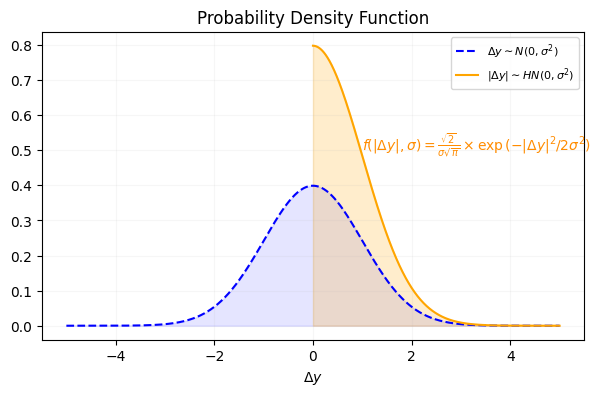

In [ ]:
#@markdown 【推導】:
#@markdown
#@markdown  依據定理 1，當殘差(Residual)服從或近似常態分布時，也就是說，
#@markdown
#@markdown  $$\Delta y = y_{\ truth} - \hat{y}_{\ train} \sim N(0,\ \sigma^2)$$
#@markdown
#@markdown  則，絕對誤差(Absolute Error)將服從或近似半常態分布
#@markdown
#@markdown  $$\vert \Delta y \vert = \vert y_{\ truth} - \hat{y}_{\ train} \vert \sim HN(0,\ \sigma^2) \ \text{。}$$
#@markdown

import numpy as np
from scipy.stats import norm, halfnorm
import matplotlib.pyplot as plt

# Generate x values
x_normal = np.linspace(-5, 5, 1000)
x_halfnormal = np.linspace(0, 5, 1000)

# Compute PDF values of Normal distribution and Half-normal distribution
pdf_normal = norm.pdf(x_normal)
pdf_halfnormal = halfnorm.pdf(x_halfnormal)

# Visualization of PDF values
plt.figure(figsize=(7, 4))
plt.plot(x_normal, pdf_normal, ls='--', color='blue', label='$\Delta y \sim N(0, \sigma^2)$', )
plt.plot(x_halfnormal, pdf_halfnormal, color='orange', label='$\\vert \Delta y \\vert \sim HN(0, \sigma^2)$')
plt.fill_between(x_normal, pdf_normal, alpha=0.1, color='blue')
plt.fill_between(x_halfnormal, pdf_halfnormal, alpha=0.2, color='orange')
plt.title('Probability Density Function', fontsize=12)
plt.xlabel('$\Delta y$', fontsize=10)
plt.grid(alpha=0.1)
plt.legend(fontsize=8)

text = '$f(\\vert \Delta y \\vert, \sigma) = \\frac{\sqrt{2}}{\sigma\sqrt{\pi}}\\times \exp{(-\\vert \Delta y \\vert^2/2\sigma^2} )$'
plt.text(1, 0.5, text, color='darkorange', fontsize=10)
plt.show()

#@markdown  計算半常態分布的不偏估計量，我們可得
#@markdown
#@markdown  \begin{aligned}\displaystyle
#@markdown  E(\vert \Delta y \vert) &= \int_{0}^{\infty} \vert \Delta y \vert \times \frac{\sqrt{2}}{\sigma\sqrt{\pi}} \times \exp{\Big(-\frac{\vert \Delta y \vert^2}{2\sigma^2} \Big)}	\ d(\vert \Delta y \vert) \\\\
#@markdown  &= \frac{1}{\sigma\sqrt{2\pi}} \times \int_{0}^{\infty} \exp{\Big( -\frac{\vert \Delta y \vert^2}{2\sigma^2} \Big)} \ d(\vert \Delta y \vert^2) \\\\
#@markdown  &= \sqrt{\frac{2}{\pi}} \times \sigma \text{ ，}
#@markdown  \end{aligned}
#@markdown
#@markdown  也就是說，$MAE \approx 0.8 \times \sigma$。


## 單點預測誤差的監控上界



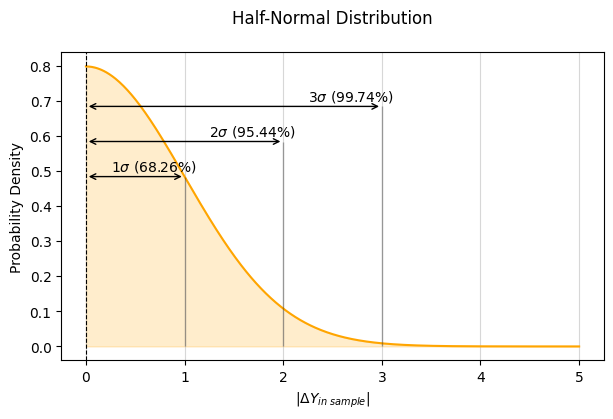

In [ ]:
#@markdown * 在訓練 ML 模型時，若模型的解釋能力指標 $R^2 \nearrow 1$ 越高，則，回測的預測能力指標 $MAE_{\ in \ sample} \searrow 0$ 越小，甚至，ML 模型在訓練集的單點回測誤差，理論上會近似或符合常態分布。
#@markdown
#@markdown * 在訓練集中，當 ML 模型的單點回測誤差近似或符合常態時，單點回測的絕對誤差會近似或符合半常態分布。此外，從上述定理 2，我們可得下列關係式</br>$$MAE_{\ in \ sample} \approx 0.8 \times \sigma_{\vert \Delta Y_{\ in \ sample}\vert} \ \text{。}$$
#@markdown
#@markdown * 因此，針對單點預測的絕對誤差監控，我們可藉由訓練模型時的回測 $MAE_{\ in \ sample}$，作為設置管制界線的基準，也就是說，若以 $4\times MAE_{\ in \ sample}$ 作為管制界線，以 [SPC](https://en.wikipedia.org/wiki/Statistical_process_control) 管制圖的概念而言，相當於係回測的絕對誤差分布，採用 $3.2$ 倍 $\sigma_{\vert \Delta Y_{\ in \ sample}\vert}$ 作為管制上界。

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(0, 5, 500)
pdf = 2*norm.pdf(x)

# Visualization of half-normal distribution
plt.figure(figsize=(7, 4))
plt.plot(x, pdf, color='orange', lw=1.5)
plt.fill_between(x, pdf, alpha=0.2, color='orange')

# 1 sigma
plt.annotate('', xy=(1, 2*norm.pdf(1)), xytext=(0, 2*norm.pdf(1)),
             arrowprops=dict(arrowstyle='<->', color='black', lw=1), alpha=0.3)
plt.vlines(x=1, ymin=0, ymax=2*norm.pdf(1), color='black', lw=1, alpha=0.3)
plt.text(0.25, 0.5, '$1\sigma$ (68.26%)', fontsize=10)

# 2 sigma
plt.annotate('', xy=(2, 2*norm.pdf(1)+0.1), xytext=(0, 2*norm.pdf(1)+0.1),
             arrowprops=dict(arrowstyle='<->', color='black', lw=1), alpha=0.3)
plt.vlines(x=2, ymin=0, ymax=2*norm.pdf(1)+0.1, color='black', lw=1, alpha=0.3)
plt.text(1.25, 0.6, '$2\sigma$ (95.44%)', fontsize=10)

# 3 sigma
plt.annotate('', xy=(3, 2*norm.pdf(1)+0.2), xytext=(0, 2*norm.pdf(1)+0.2),
             arrowprops=dict(arrowstyle='<->', color='black', lw=1), alpha=0.3)
plt.vlines(x=3, ymin=0, ymax=2*norm.pdf(1)+0.2, color='black', lw=1, alpha=0.3)
plt.text(2.25, 0.7, '$3\sigma$ (99.74%)', fontsize=10)

plt.title('Half-Normal Distribution\n', fontsize=12)
plt.xlabel('$\\vert\Delta Y_{in \ sample}\\vert$', fontsize=10)
plt.ylabel("Probability Density", fontsize=10)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)  # Y-axis for clarity
plt.grid(axis='x', alpha=0.5)

img_path = 'Half_Normal_Distribution_of_In_Sample_AE.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

## 實務案例

在下列實務案例中，我們要訓練一個 ML 模型，用來預測鎳現金結算(Nickel Cash Settlement)的價格。   
  
有關訓練 ML 模型的資料集，我們蒐集 2023 年 10 月到 2024 年 8 月相關的市場資訊，例如 : 匯率、貴金屬價格、銅現金結算與庫存等(資料來源 : [Westmetall](https://www.westmetall.com/en/westmetall.html))，總計 13 個特徵、229 筆資料，作為此 ML 模型的訓練集，且，在模型訓練完成後，用以預測 2024 年 9 月之後的鎳現金結算。鎳現金結算價格在訓練與測試區間的走勢，如下圖所示 :       
  
<p align='center'>
<img width='550' src='https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/Absolute_Error_Monitoring/imgs/Training_and_Testing_Data.png'>
</p>
</br>  

下圖為 ML 模型在訓練集的回測值與測試集的預測值，其中，模型在訓練集中的解釋能力與預測能力指標，分別為 : $R^2 \approx 0.91$、$MAE_{\ in \ sample} \approx 305.6$、$MAPE_{\ in \ sample} \approx 0.0176$。從圖中可觀察出，模型在 2024 年 11 月後的預測值，開始趨於平穩且無顯著的趨勢波動，因此，在整個測試集(9 月到 12 月)中，模型的解釋能力指標大幅下降至 $R^2 \approx 0.77$。  

<p align='center'>
<img width='550' src='https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/Absolute_Error_Monitoring/imgs/Out_of_sample_Predictions.png'>
</p>
</br>    
   
另外，下圖為 ML 模型預測表現的監控，我們以採集 25 筆預測誤差滾動計算 $MAE$，且設定 1.05 倍的回測 $MAE_{\ in \ sample} \approx 305.6$ 為監控的上界，則，直到 12 月初模型的預測值，才會警示疑似有預測失準的現象。然而，若我們也同時監控單點的預測誤差，則，可較早在 11 月中，發現單點的預測誤差逐漸變大(連續 7 點上升)，甚至有超出 2.5 倍的回測 $MAE_{\ in \ sample}$ 界線。   

<p align='center'>
<img width='550' src='https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/Absolute_Error_Monitoring/imgs/AE_Monitoring_with_In_sample_MAE.png'>
</p>
  
上述單點預測的絕對誤差監控，其界限的設定基準 $MAE_{\ in \ sample}$，係基於 ML 模型在訓練集的回測，其殘差近似或符合平均值為 0 的常態分布，然而，若要更準確地設定監控界限，則，可採用實際的回測殘差分布。下圖為 ML 模型在訓練集回測的絕對誤差分布 :  

<p align='center'>
<img width='550' src='https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/Absolute_Error_Monitoring/imgs/In_sample_Residuals.png'>
</p>
  
若以實際回測的絕對誤差分布，計算此分布的標準差，作為監控界限的基準，如下圖所示，則我們可觀察到，約從 9 月中下旬開始，預測的絕對誤差較頻繁落於 2 到 3 倍標準差之間，更敏銳地監測出誤差失準的跡象。
  
<p align='center'>
<img width='550' src='https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/Absolute_Error_Monitoring/imgs/AE_Monitoring_with_Sigma_of_In_sample_Residuals.png'>
</p>

此實例可體現，單點預測誤差搭配預測能力指標的監控，能更即時示警預測失準的現象，提醒使用者檢視且重新訓練模型，以確保模型的品質與有效性。  



# Takeaway  
  
針對**迴歸問題** ...  
1. 在訓練 ML 模型時，當模型的解釋能力指標 $R^2 \nearrow 1$ 越高，則，回測的預測能力指標 $MAE_{\ in \ sample} \searrow 0$ 越小，甚至，訓練集中單點回測的殘差，將越近似或符合常態分布。  

2. 在訓練 ML 模型時，若單點回測的殘差近似或符合常態，則，單點回測的絕對誤差會近似或符合半常態分布。

3. 在訓練集中，當模型單點回測的絕對誤差近似或符合半常態分布時，則，可推導得下列關係式     
$$MAE_{\ in \ sample} \approx 0.8 \times \sigma_{\vert \Delta Y_{\ in \ sample}\vert} \ \text{。}$$  

4. 在監控 ML 模型時，對於單點預測的絕對誤差監控，可藉由訓練模型時的回測 $MAE_{\ in \ sample}$，作為設定監控上界的基準。  
在製造業的場域中，結合 [SPC](https://en.wikipedia.org/wiki/Statistical_process_control) 管制圖的概念，這相當於採用單點的絕對誤差分布中的 $0.8 \times \sigma_{\vert \Delta Y_{\ in \ sample} \vert}$，作為管制界限的基準。  
</br>  
<p align='center'>
<img width='450' src='https://raw.githubusercontent.com/YenLinWu/Daily_Work_of_Data_Science/Dev/Absolute_Error_Monitoring/imgs
/Half_Normal_Distribution_of_In_Sample_AE.png'>
</p>


# 實例 Python 程式碼

### 安裝與載入套件

In [ ]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.7 MB/s eta 0:00:00


In [ ]:
import sys
import re

import datetime as dt
import numpy as np
import pandas as pd
import scipy
from scipy.stats import norm, gaussian_kde
import matplotlib as mpl
import matplotlib.pyplot as plt

from lightgbm import LGBMRegressor
import sklearn
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

print('Python version:', sys.version[0:7])
print('Regular Expression version:', re.__version__)
print('NumPy version:', np.__version__)
print('Pandas version:', pd.__version__ )
print('SciPy version:', scipy.__version__)
print('Matplotlib version:', mpl.__version__)
print('Scikit-Learn version:', sklearn.__version__)

Python version: 3.10.12
Regular Expression version: 2.2.1
NumPy version: 1.26.4
Pandas version: 2.2.2
SciPy version: 1.13.1
Matplotlib version: 3.8.0
Scikit-Learn version: 1.5.2


### 讀取資料

In [ ]:
# Read the Excel file into a DataFrame
sample_data = pd.read_excel('./sample_data.xlsx')
sample_data['date'] = sample_data.apply(lambda x: dt.datetime.strptime(x['date'], '%d. %B %Y').date(), axis=1)
sample_data = sample_data.set_index('date')
sample_data = sample_data.asfreq('D')
sample_data = sample_data.sort_index()
sample_data = sample_data.dropna()

print('Shape of Sample Data =', sample_data.shape)
sample_data.head()

Shape of Sample Data = (555, 11)


,Nickel_Cash_Settlement,FX_Rate,Gold_London_Fixing,Nickel_Stock,Fine_Silver_Processed,Copper_Cash_Settlement,Copper_Stock,Aluminium_Cash_Settlement,Aluminium_Stock,Tin_Cash_Settlement,Tin_Stock
date,,,,,,,,,,,
2022-10-03,21575.0,0.9769,1649.50,52374.0,725.9,7524.0,135750.0,2164.0,330050.0,20345.0,4875.0
2022-10-04,21300.0,0.9892,1709.15,51792.0,791.5,7596.0,136750.0,2261.5,328600.0,20255.0,4830.0
2022-10-05,22275.0,0.9905,1712.15,51558.0,771.9,7661.0,138650.0,2289.0,328525.0,20305.0,4810.0
2022-10-06,22350.0,0.9869,1716.00,51420.0,778.8,7744.0,140200.0,2355.0,328850.0,20250.0,4675.0
2022-10-07,22360.0,0.9787,1711.50,52362.0,788.2,7575.5,143775.0,2342.0,327625.0,20000.0,4690.0


In [ ]:
# Target Name
y_name = 'Nickel_Cash_Settlement'

# Feature Names
X_names = [x for x in sample_data.columns.values if not re.fullmatch(y_name, x)]

print('Target Name =', y_name)
print('Feature Names =', X_names)

Target Name = Nickel_Cash_Settlement
Feature Names = ['FX_Rate', 'Gold_London_Fixing', 'Nickel_Stock', 'Fine_Silver_Processed', 'Copper_Cash_Settlement', 'Copper_Stock', 'Aluminium_Cash_Settlement', 'Aluminium_Stock', '\xa0Tin_Cash_Settlement', 'Tin_Stock']


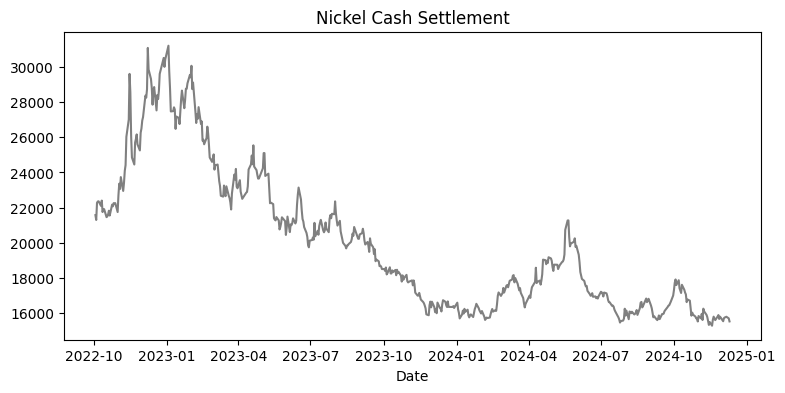

In [ ]:
# Trend Chart of Target
fig = plt.figure(figsize=(9, 4))
plt.plot(sample_data[y_name], linestyle='-', color='gray')
plt.title(y_name.replace('_', ' '))
plt.xlabel('Date')

img_path = 'Trend_Chart_of_Target.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

### 定義函數

In [ ]:
def create_lags(target, target_name, lags):
    '''
    建立滯後(lag)特徵。

    params:
        target (df): 目標變數
        target_name (str): 目標變數的名稱
        lags (int): 滯後數

    return:
        lags (df): 滯後特徵
    '''

    # 轉換目標變數的格式
    if isinstance(target, pd.Series):
        target = target.to_frame(name=target_name)
    else:
        target = target.copy()

    # 建立滯後特徵
    for l in range(1, lags+1):
        target['lag_'+str(l)] = target[target_name].shift(periods=l)
        lags = target.drop(columns=[target_name])

    return lags

In [ ]:
def generate_linear_weights(n):
    '''
    生成一個權重列表，其中，資料的索引值越小權重越大，且權重加總為 1。

    params:
        n (int): 資料筆數

    return:
       weights (list): 權重列表
    '''

    weights = np.arange(n, 0, -1)
    weights = weights/weights.sum()

    return weights.tolist()

### 篩選資料   

濾除 2023 年 10 月之前的資料。

In [ ]:
# Data start from 2023/10/02
data = sample_data['2023-09-30 23:59:00':]
y = data[y_name]
X = data[X_names]

### 建立滯後特徵

In [ ]:
# Set length of lag
lags = 3

In [ ]:
# Lags of Target
if lags>0:
    lags_info = create_lags(y, target_name=y_name, lags=lags)
    X = pd.merge(X, lags_info, how='left', left_index=True, right_index=True)
    X.dropna(inplace=True)
    y = y[lags:]

### 切分訓練集與測試集

Shape of Train Features  = (229, 13)
Shape of Train Target  = (229,)
Shape of Test Features = (72, 13)
Shape of Test Target  = (72,)


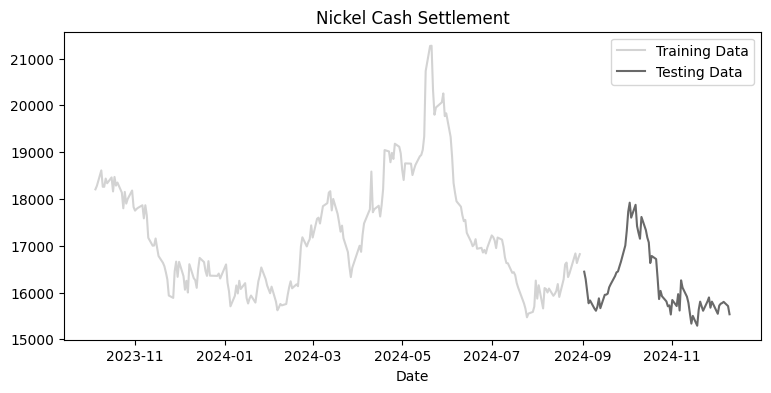

In [ ]:
# Split training and testing data
end_train = '2024-09-01 23:59:00'
y_train = y[:end_train]
y_test = y[end_train:]
X_train = X[:end_train]
X_test = X[end_train:]
print('Shape of Train Features  =', X_train.shape)
print('Shape of Train Target  =', y_train.shape)
print('Shape of Test Features =', X_test.shape)
print('Shape of Test Target  =', y_test.shape)

# Datetime Index of Tarin and Test Data
train_dt_idx = y_train.index
test_dt_idx = y_test.index

# Trend Chart of Target
fig = plt.figure(figsize=(9, 4))
plt.plot(y_train, color='lightgray', linestyle='-', label='Training Data')
plt.plot(y_test, color='dimgrey', linestyle='-', label='Testing Data')
plt.legend()
plt.title(y_name.replace('_', ' '))
plt.xlabel('Date')

img_path = 'Training_and_Testing_Data.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

### 訓練模型   

Reference
* [lightgbm.LGBMRegressor](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html#lightgbm-lgbmregressor)

In [ ]:
# Build Model
model = LGBMRegressor(boosting_type='dart',
                      learning_rate=0.115,
                      n_estimators=290,
                      importance_type='split',
                      extra_tree=False,
                      bagging_fraction=0.9,
                      feature_fraction=0.9,
                      bagging_freq=2,
                      verbose=-1
                      )

# Train Model
weights = generate_linear_weights(len(y_train))
model.fit(X_train, y_train, sample_weight=weights, eval_metric='mae')

LGBMRegressor(bagging_fraction=0.9, bagging_freq=2, boosting_type='dart',
              extra_tree=False, feature_fraction=0.9, learning_rate=0.115,
              n_estimators=290, verbose=-1)

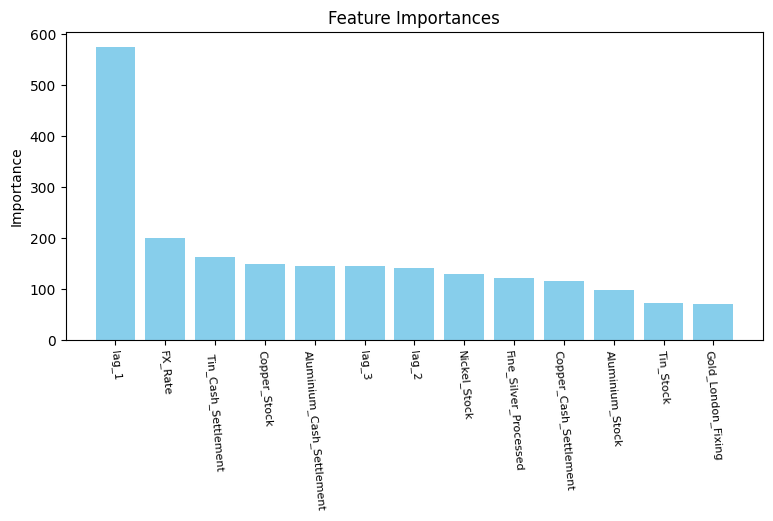

In [ ]:
#@markdown 特徵重要性

# Feature Importances
importances = pd.DataFrame({'feature':model.feature_names_in_,
                            'importance':model.feature_importances_})

importances.sort_values(by=['importance'], ascending=False, inplace=True)
importances

# Visualization of Feature Importances
fig = plt.figure(figsize=(9, 4))
plt.bar(range(len(importances.index)), importances.importance,
        color='skyblue', align='center')
plt.title('Feature Importances')
plt.xticks(range(len(importances.index)), importances.feature,
           rotation=-85, fontsize=8)
plt.xlim([-1, len(importances.index)])
plt.ylabel('Importance')

img_path = 'Feature_Importances.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show( )

In-sample
R2 = 0.9105842127626493
MAE = 305.6419213973799
MAPE = 0.017628785534248




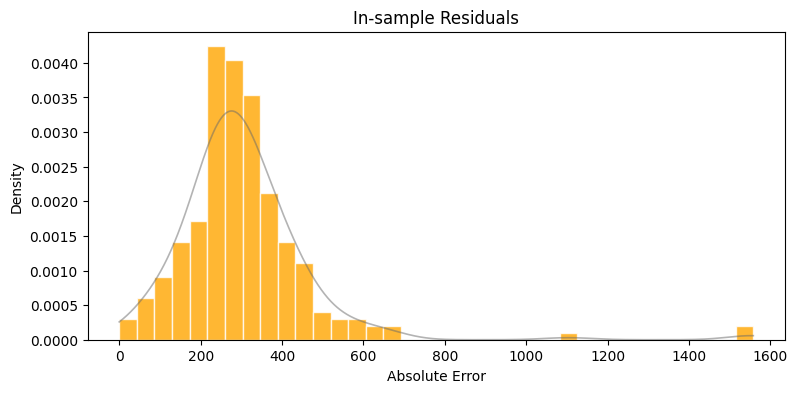

In [ ]:
#@markdown 在訓練集中，模型的回測殘差(Residuals) :

# In-sample predictions
in_sample_predictions = model.predict(X_train)
in_sample_predictions = in_sample_predictions.round()
in_sample_predictions = pd.Series(in_sample_predictions, index=train_dt_idx)

# In-sample: Mean Absolute Error and Mean Absolute Percentage Error
r2_train = r2_score(y_train, in_sample_predictions)
mae_train = mean_absolute_error(y_train, in_sample_predictions)
mape_train = mean_absolute_percentage_error(y_train, in_sample_predictions)
print('In-sample')
print(f'R2 = {r2_train}')
print(f'MAE = {mae_train}')
print(f'MAPE = {mape_train}')
print('\n')

# Distribution of In-sample Residuals
in_sample_residuals = in_sample_predictions - y_train
kde = gaussian_kde(np.abs(in_sample_residuals))
x_vals = np.linspace(min(np.abs(in_sample_residuals)), max(np.abs(in_sample_residuals)), 10000)
density = kde(x_vals)

plt.figure(figsize=(9, 4))
plt.hist(np.abs(in_sample_residuals), bins='auto', density=True,
         ec='white', fc='orange', alpha=0.8)
plt.plot(x_vals, density, color='dimgray', lw=1.2, alpha=0.5)
plt.title('In-sample Residuals')
plt.xlabel('Absolute Error')
plt.ylabel('Density')

img_path = 'In_sample_Residuals.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

### 預測誤差    

在測試集中，模型預測值的單點絕對誤差與滾動式平均絕對誤差。

In-sample
R2 = 0.9105842127626493
MAE = 305.6419213973799
MAPE = 0.017628785534248

Out-of-sample
R2 = 0.765644482225427
MAE = 264.4583333333333
MAPE = 0.016383191954157435


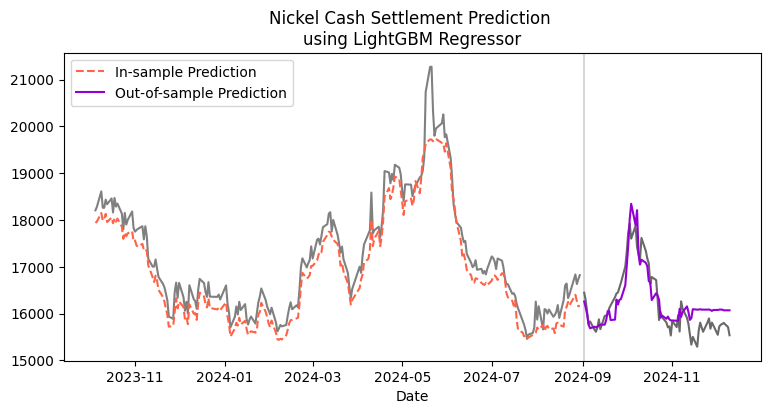

In [ ]:
#@markdown 預測值與實際值的趨勢圖 :

print('In-sample')
print(f'R2 = {r2_train}')
print(f'MAE = {mae_train}')
print(f'MAPE = {mape_train}')

# Out-of-sample Predictions
predictions = model.predict(X_test)
predictions = predictions.round()
predictions = pd.Series(predictions, index=test_dt_idx)

# Out-of-sample: Mean Absolute Error and Mean Absolute Percentage Error
r2_test = r2_score(y_test, predictions)
mae_test = mean_absolute_error(y_test, predictions)
mape_test = mean_absolute_percentage_error(y_test, predictions)
print('\nOut-of-sample')
print(f'R2 = {r2_test}')
print(f'MAE = {mae_test}')
print(f'MAPE = {mape_test}')

# Trend Chart of Prediction and Ground Truth
plt.figure(figsize=(9, 4))
plt.axvline(x=test_dt_idx[0], color='gray', ls='-', lw=1.5, alpha=0.3)
plt.plot(pd.Series(y_train.values, train_dt_idx), color='gray')
plt.plot(in_sample_predictions, color='tomato', ls='--', label='In-sample Prediction')
plt.plot(y_test, color='dimgrey')
plt.plot(predictions, color='darkviolet', label='Out-of-sample Prediction')
plt.legend()
plt.title('Nickel Cash Settlement Prediction \nusing LightGBM Regressor')
plt.xlabel('Date')

img_path = 'Out_of_sample_Predictions.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

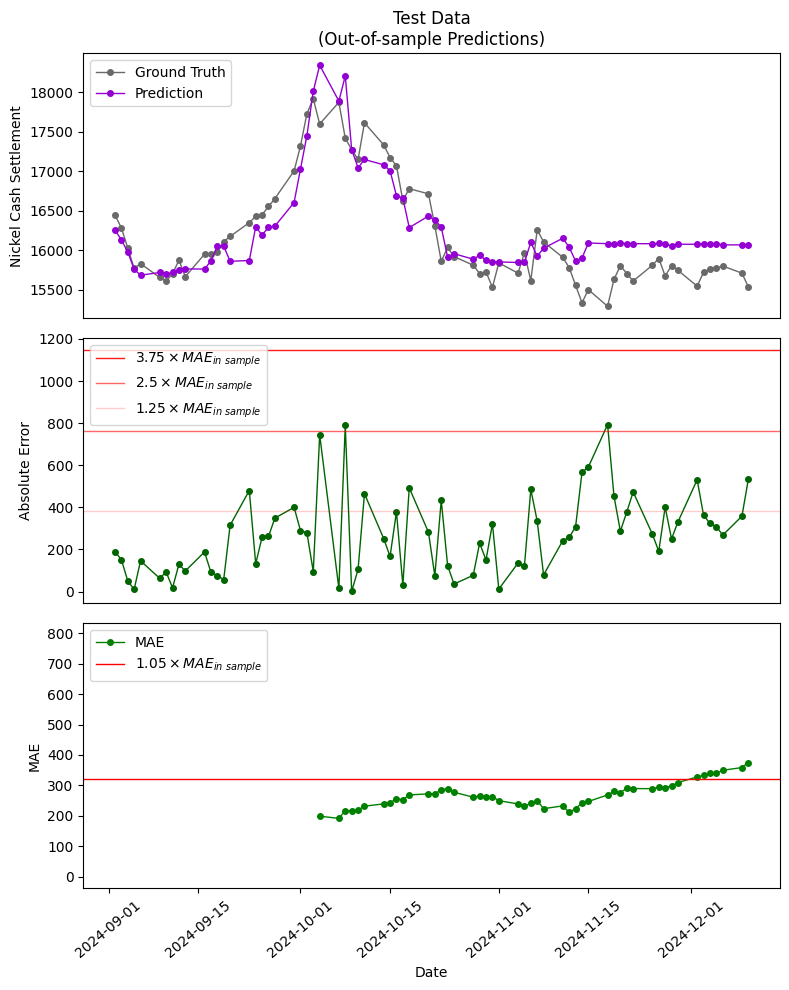

In [ ]:
#@title
#@markdown 以訓練模型時的 $MAE_{\ in \ sample}$，作為單點預測誤差與滾動式 $MAE$ 的監控上界基準 :

# Calculate absolute error and MAE
absolute_errors = np.abs(predictions-y_test)
absolute_errors = pd.DataFrame(absolute_errors, columns=['absolute_error'])
absolute_errors['MAE'] = absolute_errors['absolute_error'].rolling(window=25).mean()

# Trend Chart of AE and MAE
plt.figure(figsize=(8, 10))
plt.subplot(311)
plt.plot(y_test, lw=1, marker='o', markersize=4, color='dimgrey', label='Ground Truth')
plt.plot(predictions, lw=1, marker='o', markersize=4, color='darkviolet', label='Prediction')
plt.xticks([])
plt.title('Test Data\n(Out-of-sample Predictions)')
plt.ylabel(y_name.replace('_', ' '))
plt.legend(loc=2)

plt.subplot(312)
plt.plot(y_test.index, absolute_errors.absolute_error, lw=1,
         marker='o', markersize=4, color='darkgreen')
plt.axhline(y=3.75*mae_train, lw=1, color='red', alpha=0.9, ls='-', label='$3.75 \\times MAE_{in \ sample}$')
plt.axhline(y=2.5*mae_train, lw=1, color='red', alpha=0.6, ls='-', label='$2.5 \\times MAE_{in \ sample}$')
plt.axhline(y=1.25*mae_train, lw=1, color='red', alpha=0.2, ls='-', label='$1.25 \\times MAE_{in \ sample}$')

plt.xticks([])
plt.ylabel('Absolute Error')
plt.legend(loc=2)

plt.subplot(313)
plt.plot(y_test.index, absolute_errors.absolute_error, color='white')
plt.plot(y_test.index, absolute_errors.MAE, lw=1,
         marker='o', markersize=4, color='green', label='MAE')
plt.axhline(y=1.05*mae_train, lw=1, color='red', ls='-', label='$1.05 \\times MAE_{in \ sample}$')
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('MAE')
plt.legend(loc=2)
plt.tight_layout()

img_path = 'AE_Monitoring_with_In_sample_MAE.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()


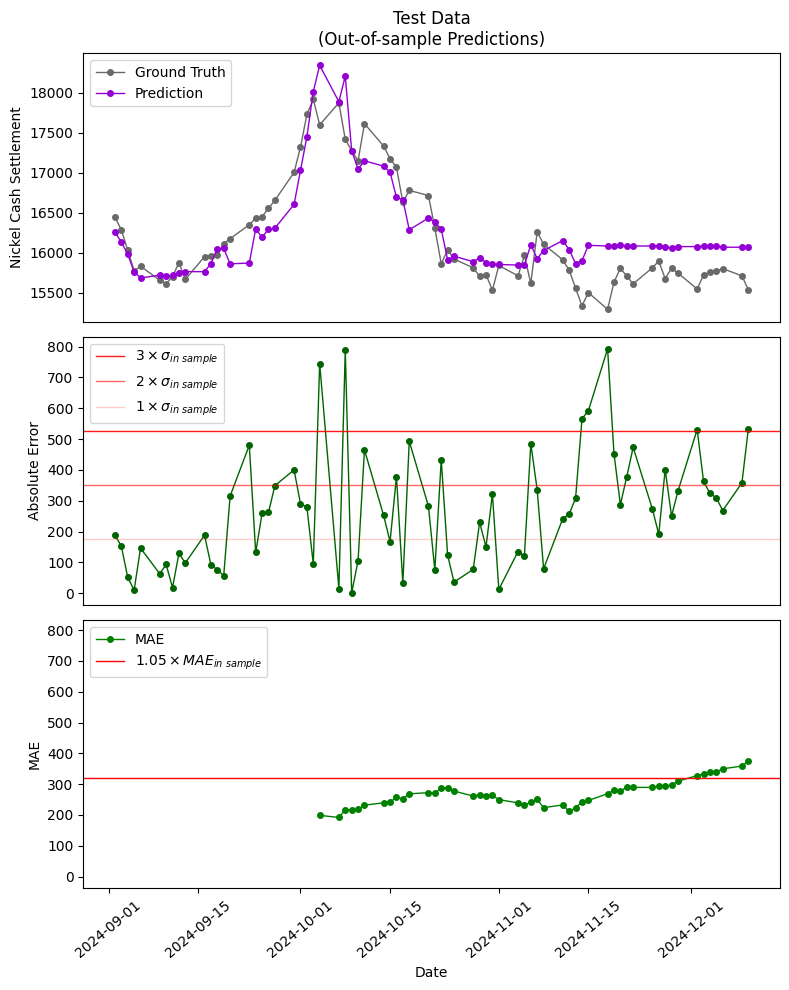

In [ ]:
#@title
#@markdown 以模型的回測殘差分布的標準差 $\sigma_{\vert \Delta Y_{\ in \ sample}\vert}$，作為單點預測誤差的監控上界基準 :

# Trend Chart of AE and MAE
plt.figure(figsize=(8, 10))
plt.subplot(311)
plt.plot(y_test, lw=1, marker='o', markersize=4, color='dimgrey', label='Ground Truth')
plt.plot(predictions, lw=1, marker='o', markersize=4, color='darkviolet', label='Prediction')
plt.xticks([])
plt.title('Test Data\n(Out-of-sample Predictions)')
plt.ylabel(y_name.replace('_', ' '))
plt.legend(loc=2)


sigma_of_in_sample_residuals = np.round(np.abs(in_sample_residuals).std())

plt.subplot(312)
plt.plot(y_test.index, absolute_errors.absolute_error, lw=1,
         marker='o', markersize=4, color='darkgreen')
plt.axhline(y=3*sigma_of_in_sample_residuals, lw=1, color='red', alpha=0.9, ls='-', label='$3 \\times \sigma_{in \ sample}$')
plt.axhline(y=2*sigma_of_in_sample_residuals, lw=1, color='red', alpha=0.6, ls='-', label='$2 \\times \sigma_{in \ sample}$')
plt.axhline(y=sigma_of_in_sample_residuals, lw=1, color='red', alpha=0.2, ls='-', label='$1 \\times \sigma_{in \ sample}$')

plt.xticks([])
plt.ylabel('Absolute Error')
plt.legend(loc=2)

plt.subplot(313)
plt.plot(y_test.index, absolute_errors.absolute_error, color='white')
plt.plot(y_test.index, absolute_errors.MAE, lw=1,
         marker='o', markersize=4, color='green', label='MAE')
plt.axhline(y=1.05*mae_train, lw=1, color='red', ls='-', label='$1.05 \\times MAE_{in \ sample}$')
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('MAE')
plt.legend(loc=2)
plt.tight_layout()

img_path = 'AE_Monitoring_with_Sigma_of_In_sample_Residuals.png'
plt.savefig(img_path, bbox_inches='tight', format='png')

plt.show()

# 參考文獻

* Kyle Siegrist. Apr 24, 2022. The General Folded Normal Distribution.  
[https://stats.libretexts.org/Bookshelves/Probability_Theory/Probability_Mathematical_Statistics_and_Stochastic_Processes_(Siegrist)/05%3A_Special_Distributions/5.13%3A_The_Folded_Normal_Distribution](https://stats.libretexts.org/Bookshelves/Probability_Theory/Probability_Mathematical_Statistics_and_Stochastic_Processes_(Siegrist)/05%3A_Special_Distributions/5.13%3A_The_Folded_Normal_Distribution).  

* [Can MAE be interpreted as the average standard deviation around the true value of a prediction?](https://stats.stackexchange.com/questions/421967/can-mae-be-interpreted-as-the-average-standard-deviation-around-the-true-value-o) in Stack Exchange.

* Taboga, Marco (2021). Unbiased estimator.  
[https://www.statlect.com/glossary/unbiased-estimator](https://www.statlect.com/glossary/unbiased-estimator).  

* Stanford's CS109 course: Probability for Computer Scientists. Part 2: Normal Distribution.  
[https://chrispiech.github.io/probabilityForComputerScientists/en/part2/normal/](https://chrispiech.github.io/probabilityForComputerScientists/en/part2/normal/)